In [ ]:
#Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import statsmodels.api as sm
from sklearn import linear_model
from scipy import stats

In [ ]:
uploaded = files.upload()
data = pd.read_excel(io.BytesIO(uploaded["Data file 1991-2021 (2).xlsx"]))
data

Saving Data file 1991-2021 (2).xlsx to Data file 1991-2021 (2).xlsx


,Export\n(USD billion),Import\n(USD billion),Seafood\n(thousand tons),Poultry\n(thousand),Cattle\n(thousand),World oil price \n(USD per barrel),Unemployment\n(%),Gold price \n(USD per tael),GDP \n(USD billion)
0,2.087,2.338,168.1,109.0,18188.5,19.37,2.092,359.4333,9.613
1,2.580,2.540,172.9,124.5,19980.0,19.02,1.912,343.2917,9.866
2,2.985,3.923,188.1,133.4,21167.0,16.84,1.969,363.9500,13.180
3,4.054,5.825,344.1,137.8,22031.8,15.89,1.931,384.6750,16.286
4,5.448,8.155,389.1,142.1,22908.1,17.18,1.899,384.3167,20.736
5,7.255,11.143,423.0,151.4,23675.6,20.42,1.930,386.4583,24.657
6,9.185,11.592,414.6,160.6,24484.3,19.17,2.870,329.5833,26.843
7,9.360,11.499,425.0,166.4,25071.1,13.06,2.290,294.5750,27.209
8,11.541,11.742,480.8,179.3,25905.1,18.07,2.330,279.8667,28.683
9,14.482,15.636,590.0,196.1,27218.9,28.23,2.260,277.0833,31.172


In [ ]:
gdp = data["GDP \n(USD billion)"]
exp = data["Export\n(USD billion)"]
imp = data["Import\n(USD billion)"]
poultry = data["Poultry\n(thousand)"]
cattle = data["Cattle\n(thousand)"]
unemp = data["Unemployment\n(%)"]
gold = data["Gold price \n(USD per tael)"]
seafood = data["Seafood\n(thousand tons)"]
oil = data["World oil price \n(USD per barrel)"]

In [ ]:
#OLS Regression
loggdp = np.log(gdp)
loggdp

0     2.263116
1     2.289095
2     2.578701
3     2.790306
4     3.031871
5     3.205061
6     3.290005
7     3.303548
8     3.356305
9     3.439520
10    3.486916
11    3.557175
12    3.677616
13    3.816107
14    4.054095
15    4.195260
16    4.349168
17    4.596432
18    4.663571
19    4.991779
20    5.150948
21    5.276031
22    5.364620
23    5.452964
24    5.477538
25    5.549446
26    5.639610
27    5.732376
28    5.800277
29    5.838436
30    5.893402
Name: GDP \n(USD billion), dtype: float64

In [ ]:
X = np.column_stack((exp, imp, seafood, poultry, cattle, oil, unemp, gold))
X = sm.add_constant(X)
X

array([[ 1.000000e+00,  2.087000e+00,  2.338000e+00,  1.681000e+02,
         1.090000e+02,  1.818850e+04,  1.937000e+01,  2.092000e+00,
         3.594333e+02],
       [ 1.000000e+00,  2.580000e+00,  2.540000e+00,  1.729000e+02,
         1.245000e+02,  1.998000e+04,  1.902000e+01,  1.912000e+00,
         3.432917e+02],
       [ 1.000000e+00,  2.985000e+00,  3.923000e+00,  1.881000e+02,
         1.334000e+02,  2.116700e+04,  1.684000e+01,  1.969000e+00,
         3.639500e+02],
       [ 1.000000e+00,  4.054000e+00,  5.825000e+00,  3.441000e+02,
         1.378000e+02,  2.203180e+04,  1.589000e+01,  1.931000e+00,
         3.846750e+02],
       [ 1.000000e+00,  5.448000e+00,  8.155000e+00,  3.891000e+02,
         1.421000e+02,  2.290810e+04,  1.718000e+01,  1.899000e+00,
         3.843167e+02],
       [ 1.000000e+00,  7.255000e+00,  1.114300e+01,  4.230000e+02,
         1.514000e+02,  2.367560e+04,  2.042000e+01,  1.930000e+00,
         3.864583e+02],
       [ 1.000000e+00,  9.185000e+00,  1

In [ ]:
model = sm.OLS(gdp,X)
reg = model.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP 
(USD billion)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     409.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           4.11e-22
Time:                        08:33:18   Log-Likelihood:                -113.52
No. Observations:                  31   AIC:                             245.0
Df Residuals:                      22   BIC:                             257.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1609     29.342      0.278      0.7

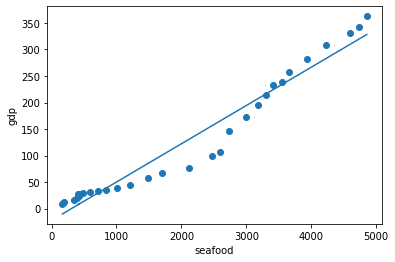

0.9756279534200016


In [ ]:
#Linear Regression
x = seafood
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("seafood")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

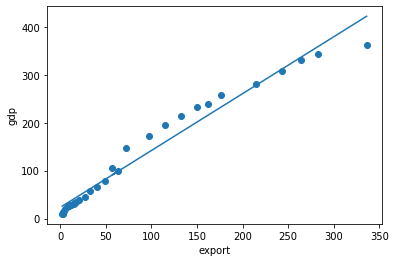

0.9842263416720117


In [ ]:
x = exp
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("export")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

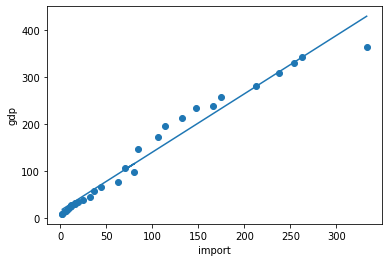

0.9859500095133115


In [ ]:
x = imp
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("import")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

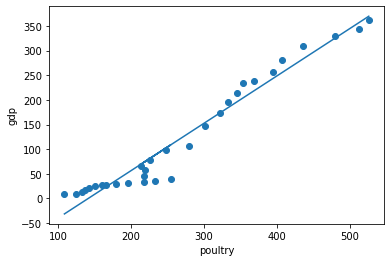

0.9765636246130187


In [ ]:
x = poultry
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("poultry")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

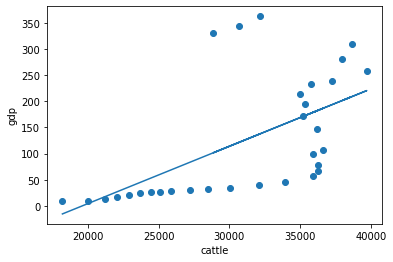

0.5862757116578178


In [ ]:
x = cattle
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("cattle")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

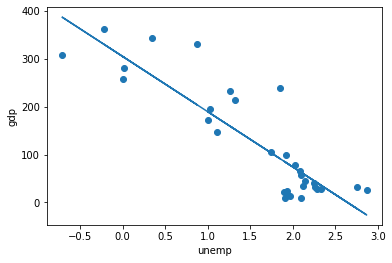

-0.8767039447246849


In [ ]:
x = unemp
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("unemp")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

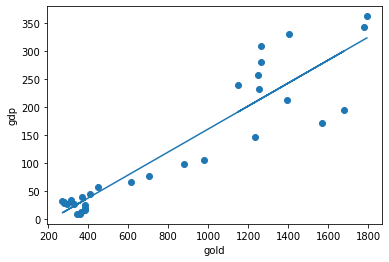

0.9223282369873621


In [ ]:
x = gold
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("gold")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)

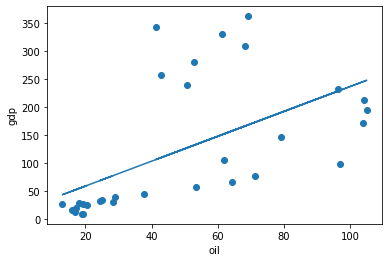

0.5746778657268857


In [ ]:
x = oil
y = gdp

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.xlabel("oil")
plt.ylabel("gdp")

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

print(r)